<a href="https://colab.research.google.com/github/7Ayushh/Cp-SOC-Ayushh/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [ ]:
#upload files - standard code
from google.colab import files
uploaded= files.upload()
#importing librarires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

#define a dataframe ie a 2D matrix storing all our data
df = pd.read_csv("NDAP_REPORT_7004.csv")

Saving NDAP_REPORT_7004.csv to NDAP_REPORT_7004.csv


In [ ]:
df.head()

Question 2

In [ ]:
#using len func to calculate the matrix dimension
rows = len(df.index)
cols = len(df.columns)
#printing integers
print(rows)
print(cols)

1473
29


Question 3

In [ ]:
#unique means non repeating
print(df.nunique())

Rowid                                                                                        1473
Country                                                                                         1
State lgd code                                                                                 36
State                                                                                          36
District lgd code                                                                             737
District                                                                                      732
Year                                                                                            1
Type of residence namely rural or urban                                                         2
Number of census houses                                                                      1437
Houses having grass or thatch or bamboo etc. as material of wall                             1364
Houses having plasti

Question 4

In [ ]:
#dtypes is a member function of panda dataframe that calculate data types of all columns
print(df.dtypes)

Rowid                                                                                          int64
Country                                                                                       object
State lgd code                                                                                 int64
State                                                                                         object
District lgd code                                                                              int64
District                                                                                      object
Year                                                                                           int64
Type of residence namely rural or urban                                                       object
Number of census houses                                                                      float64
Houses having grass or thatch or bamboo etc. as material of wall                           

Question 5

Count of zeros in column  Rowid  is :  0
Count of zeros in column  Country  is :  0
Count of zeros in column  State lgd code  is :  0
Count of zeros in column  State  is :  0
Count of zeros in column  District lgd code  is :  0
Count of zeros in column  District  is :  0
Count of zeros in column  Year  is :  0
Count of zeros in column  Type of residence namely rural or urban  is :  0
Count of zeros in column  Number of census houses  is :  5
Count of zeros in column  Houses having grass or thatch or bamboo etc. as material of wall  is :  5
Count of zeros in column  Houses having plastic or polythene as material of wall  is :  5
Count of zeros in column  Houses having mud or unburnt brick as material of wall  is :  5
Count of zeros in column  Houses having wood as material of wall  is :  5
Count of zeros in column  Houses having stone not packed with mortar as material of wall  is :  5
Count of zeros in column  Houses having stone packed with mortar as material of wall  is :  5
Count of

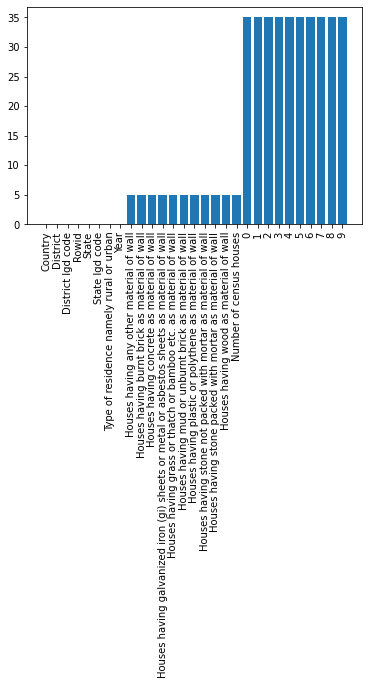

In [ ]:
#defining an empty list
freq_lst = []

#counting number of empty cells in a column col_name and then adding this to a list b along its column name.
for col_name in df.columns:
    emptycount = df[col_name].isna().sum()    #missing values in excel sheet
    b = ((col_name,emptycount))
    #adding elements to this list as we iterate the loop
    freq_lst.append(b)
    print('Count of zeros in column ', col_name, ' is : ', emptycount)

#use of numpy array for easy plotting and sorting of the list we calculated above
freq_array = np.array(freq_lst,dtype = [('field', 'U10000'), ('freq', int)])
sorted_freq = np.sort(freq_array, order='freq')

#plot barplot and x axis as field and y axis as freq
plt.bar(sorted_freq['field'],sorted_freq['freq'])
#rotate the names on x axis
plt.xticks(rotation = 90)
#show the plot
plt.show()

Question 6

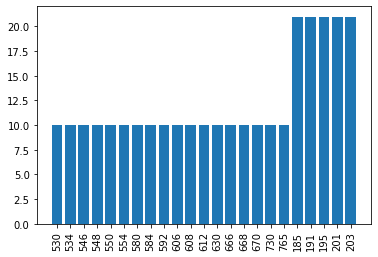

In [ ]:

freq_lst2 = []
#range(len()) means total number of rows
for row_ind in range(len(df)):
    #selecting a row as individual
    rowselected = df.iloc[row_ind,:]
    #calculating sum
    emptycount2 = rowselected.isna().sum()    #rowselected itself is a row object and has feature
    #forming a list
    b = ((row_ind,emptycount2))
    freq_lst2.append(b)

#use of numpy array for easy plotting and sorting of the list we calculated above
freq_array2 = np.array(freq_lst2,dtype = [('field', 'U10000'), ('freq', int)])    # np array to access its element of elements and sort it easily
sorted_freq2 = np.sort(freq_array2, order='freq')
#all other rows have 0 missing values so to give clarity of graph only last rows plot shown
arr= sorted_freq2[1450:]


#plot barplot and x axis as field and y axis as freq
plt.bar(arr['field'],arr['freq'])
#rotate the names on x axis
plt.xticks(rotation = 90)
#show the plot
plt.show()

Question 7

In [ ]:
# decimal round off
# zero to 0




#1
#creating a sub dataframe using iloc
subframe1 = df.iloc[:,9:19]
#why index number 9 to 19

#rounding off to 0 decimal places as number of houses has to an integer
subframe1 = subframe1.round(decimals = 0)



#2
#replacing 0 to zero to numeric 0 by checking out individual columns
df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero':0}})['Number of census houses'])
df['Houses having grass or thatch or bamboo etc. as material of wall'] = pd.to_numeric(df.replace({'Houses having grass or thatch or bamboo etc. as material of wall' : {'zero':0}})['Houses having grass or thatch or bamboo etc. as material of wall'])
df['Houses having plastic or polythene as material of wall'] = pd.to_numeric(df.replace({'Houses having plastic or polythene as material of wall' : {'zero':0}})['Houses having plastic or polythene as material of wall'])




Question 8

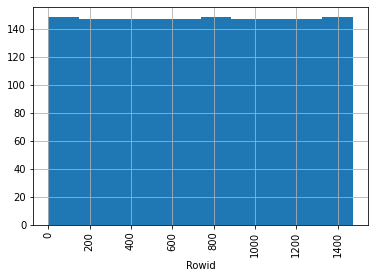

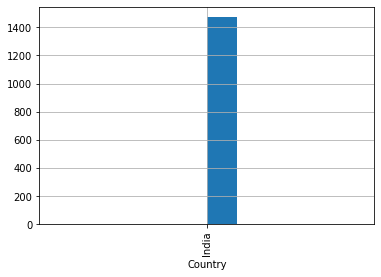

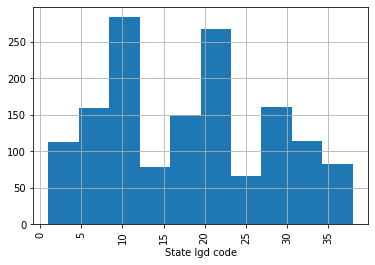

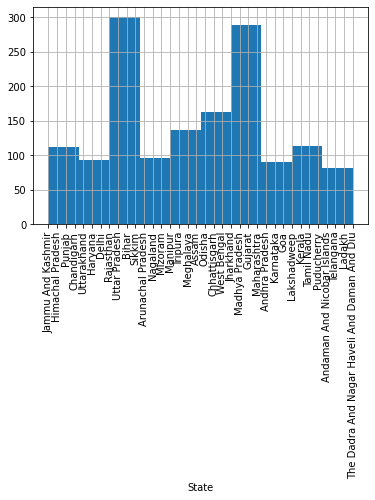

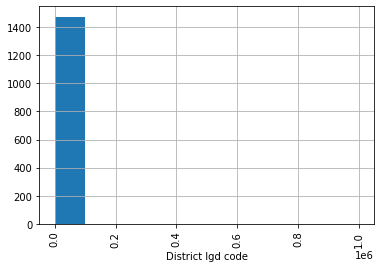

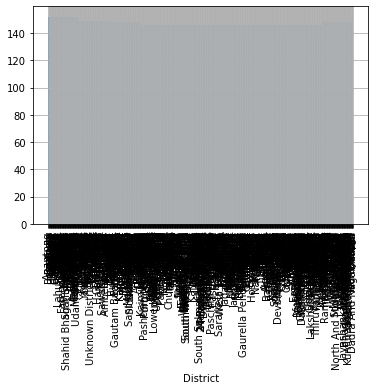

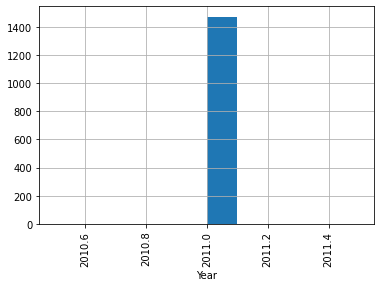

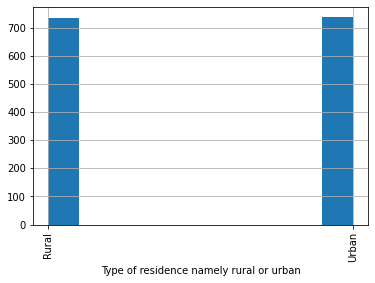

In [ ]:
#iterating through the df to check datatype of column -- as 1 column has same datatype in excel
for col in df.columns:
  #int or object type are discrete
    if df[col].dtype == 'int64' or df[col].dtype == 'object':       #error -- .dtypes nahi but .dtype

        #command to make histogram
        df[col].hist()
        #label x axis
        plt.xlabel(col)
        #name of bars rotated by 90deg
        plt.xticks(rotation = 90)
        #show plot
        plt.show()

Question 9

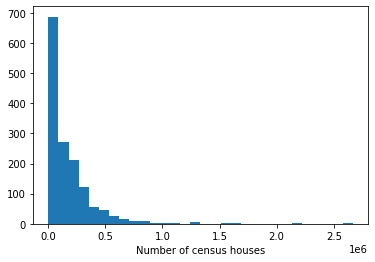

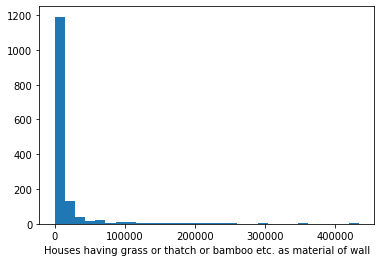

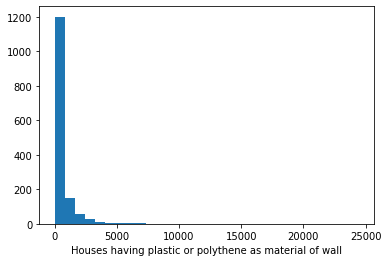

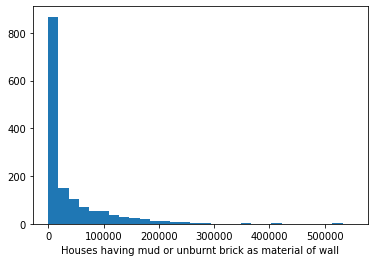

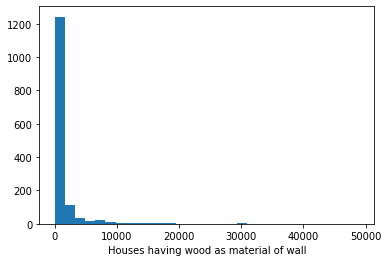

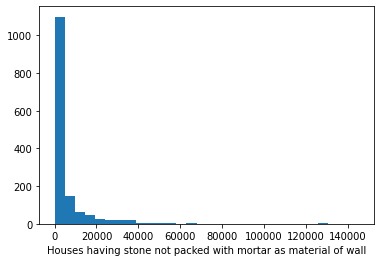

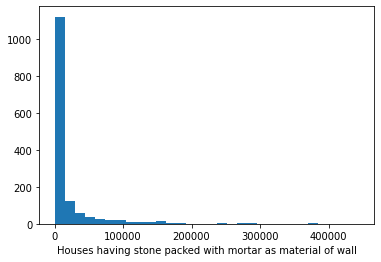

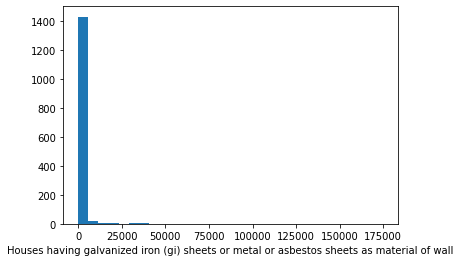

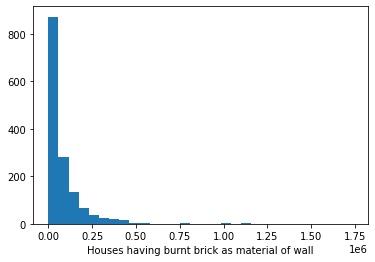

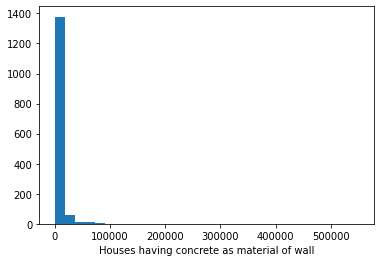

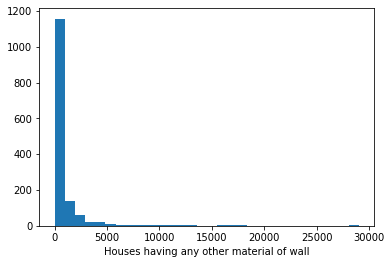

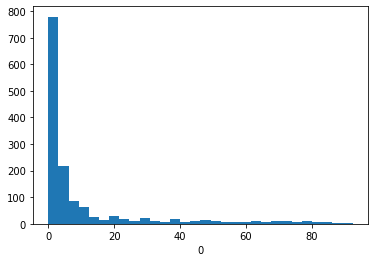

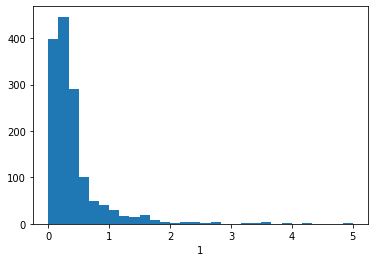

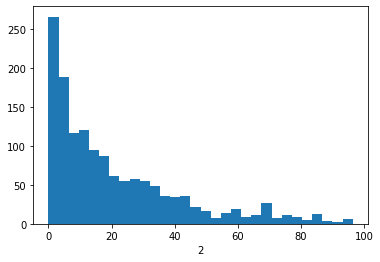

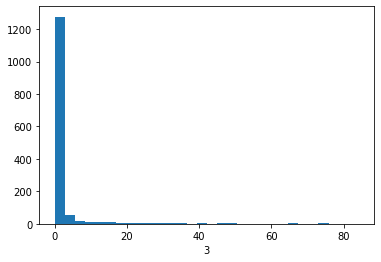

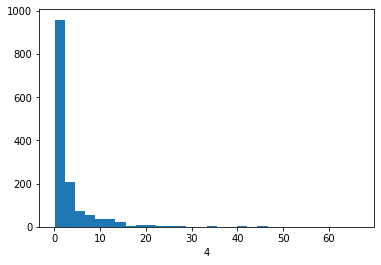

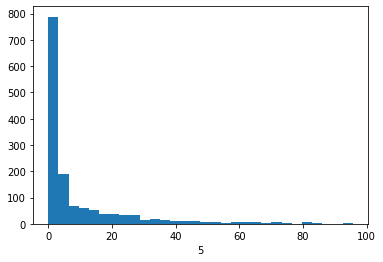

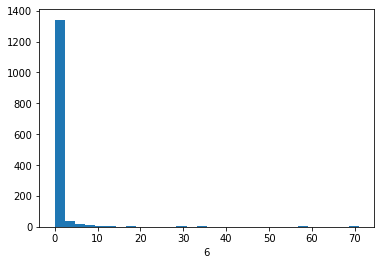

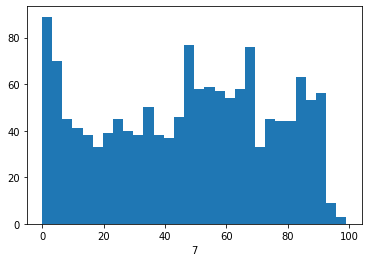

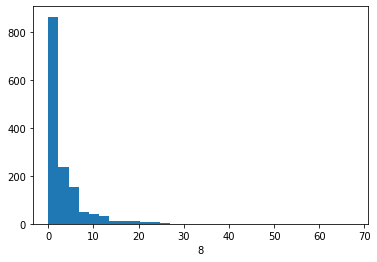

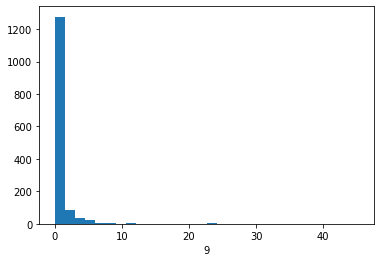

In [ ]:
for col in df:
  #float datatype used in continious ditributions
  if(df[col].dtypes == 'float64'):
    #allot number of bins where each bin is plotted as a bar whose height corresponds to how many data points are in that bin
    plt.hist(df[col],bins = 30)
    plt.xlabel(col)
    plt.show()

Question 10

In [ ]:
#all PAIRS of conti var ----- distinct elements form a pair
for i in df.columns:
  #run 2 iterators in all columns
    for j in df.columns:
        #we dont want pairs to repeat themselves
        if df[i].dtypes == 'float64':
            plt.scatter(df[i],df[j])
            plt.show()  #else this wont show individual plots
            #if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.


# calculate the correlation matrix
corr = df.corr()
# plot the heatmap
sns.heatmap(corr)
plt.show()

Question 11







In [ ]:
#creating a sub dataframe using iloc
subframe = df.iloc[:,9:19]  #last index not included

iterating_list = []
# axis=1 corresponds to sum along rows and numeric_only= true ----so it doesnt try add object values

jTOs_sum= subframe.sum(axis =1,numeric_only=True)


#create a column into list
number_of_houses = list(df['Number of census houses'])


#cant equate 2 cells so compare by seeing the difference
epsilon = 0.1
#diff of 2 list - no iteration needed
print( abs(jTOs_sum-number_of_houses) < epsilon)


Question 12

In [ ]:
i = 0
for col in subframe:
  #python will divide the column - element by element on its own
    df[i] = subframe[col]/df['Number of census houses']*100
    #add more columns to df to store these values
    i = i+1
#show starting entries for reference
display(df.head())



,Rowid,Country,State lgd code,State,District lgd code,District,Year,Type of residence namely rural or urban,Number of census houses,Houses having grass or thatch or bamboo etc. as material of wall,...,0,1,2,3,4,5,6,7,8,9
0,1,India,1,Jammu And Kashmir,1,Anantnag,2011,Rural,109465.00000,270.00000,...,0.246654,1.215914,20.746357,2.753391,2.771662,0.438496,0.209199,69.637784,1.278948,0.701594
1,2,India,1,Jammu And Kashmir,1,Anantnag,2011,Urban,33522.00000,69.00000,...,0.205835,0.360957,20.306068,0.366923,0.799475,0.277430,0.292345,70.965336,5.650021,0.775610
2,3,India,1,Jammu And Kashmir,2,Budgam,2011,Rural,85561.57321,134.18227,...,0.156825,0.197484,8.384931,1.122173,0.874737,0.357794,0.250921,85.718435,1.184903,1.751798
3,4,India,1,Jammu And Kashmir,2,Budgam,2011,Urban,13136.00000,49.00000,...,0.373021,0.205542,7.117844,0.182704,1.423569,0.228380,0.296894,86.000305,3.456151,0.715591
4,5,India,1,Jammu And Kashmir,3,Baramulla,2011,Rural,120312.42680,410.81773,...,0.341459,0.143817,15.964869,2.682891,10.433304,4.554696,1.446491,60.415171,1.760565,2.256736


Question 13

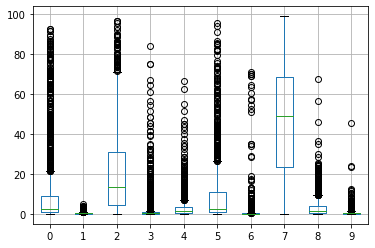

In [ ]:
#new subframe again -- new new columns that we just created above
df_new_new_columns = df.iloc[:,19:29]

#box plot
df_new_new_columns.boxplot()



Question 14

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a9c1dae50>,
      dtype=object)

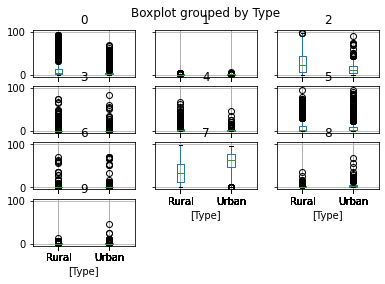

In [ ]:
#include(introduce and fill) that column in our dataframe
df_new_new_columns['Type'] = df['Type of residence namely rural or urban']
#by in the argument of boxplot is used to make boxplots for every value in the column rural or urban
df_new_new_columns.boxplot(by= 'Type')

Question 15

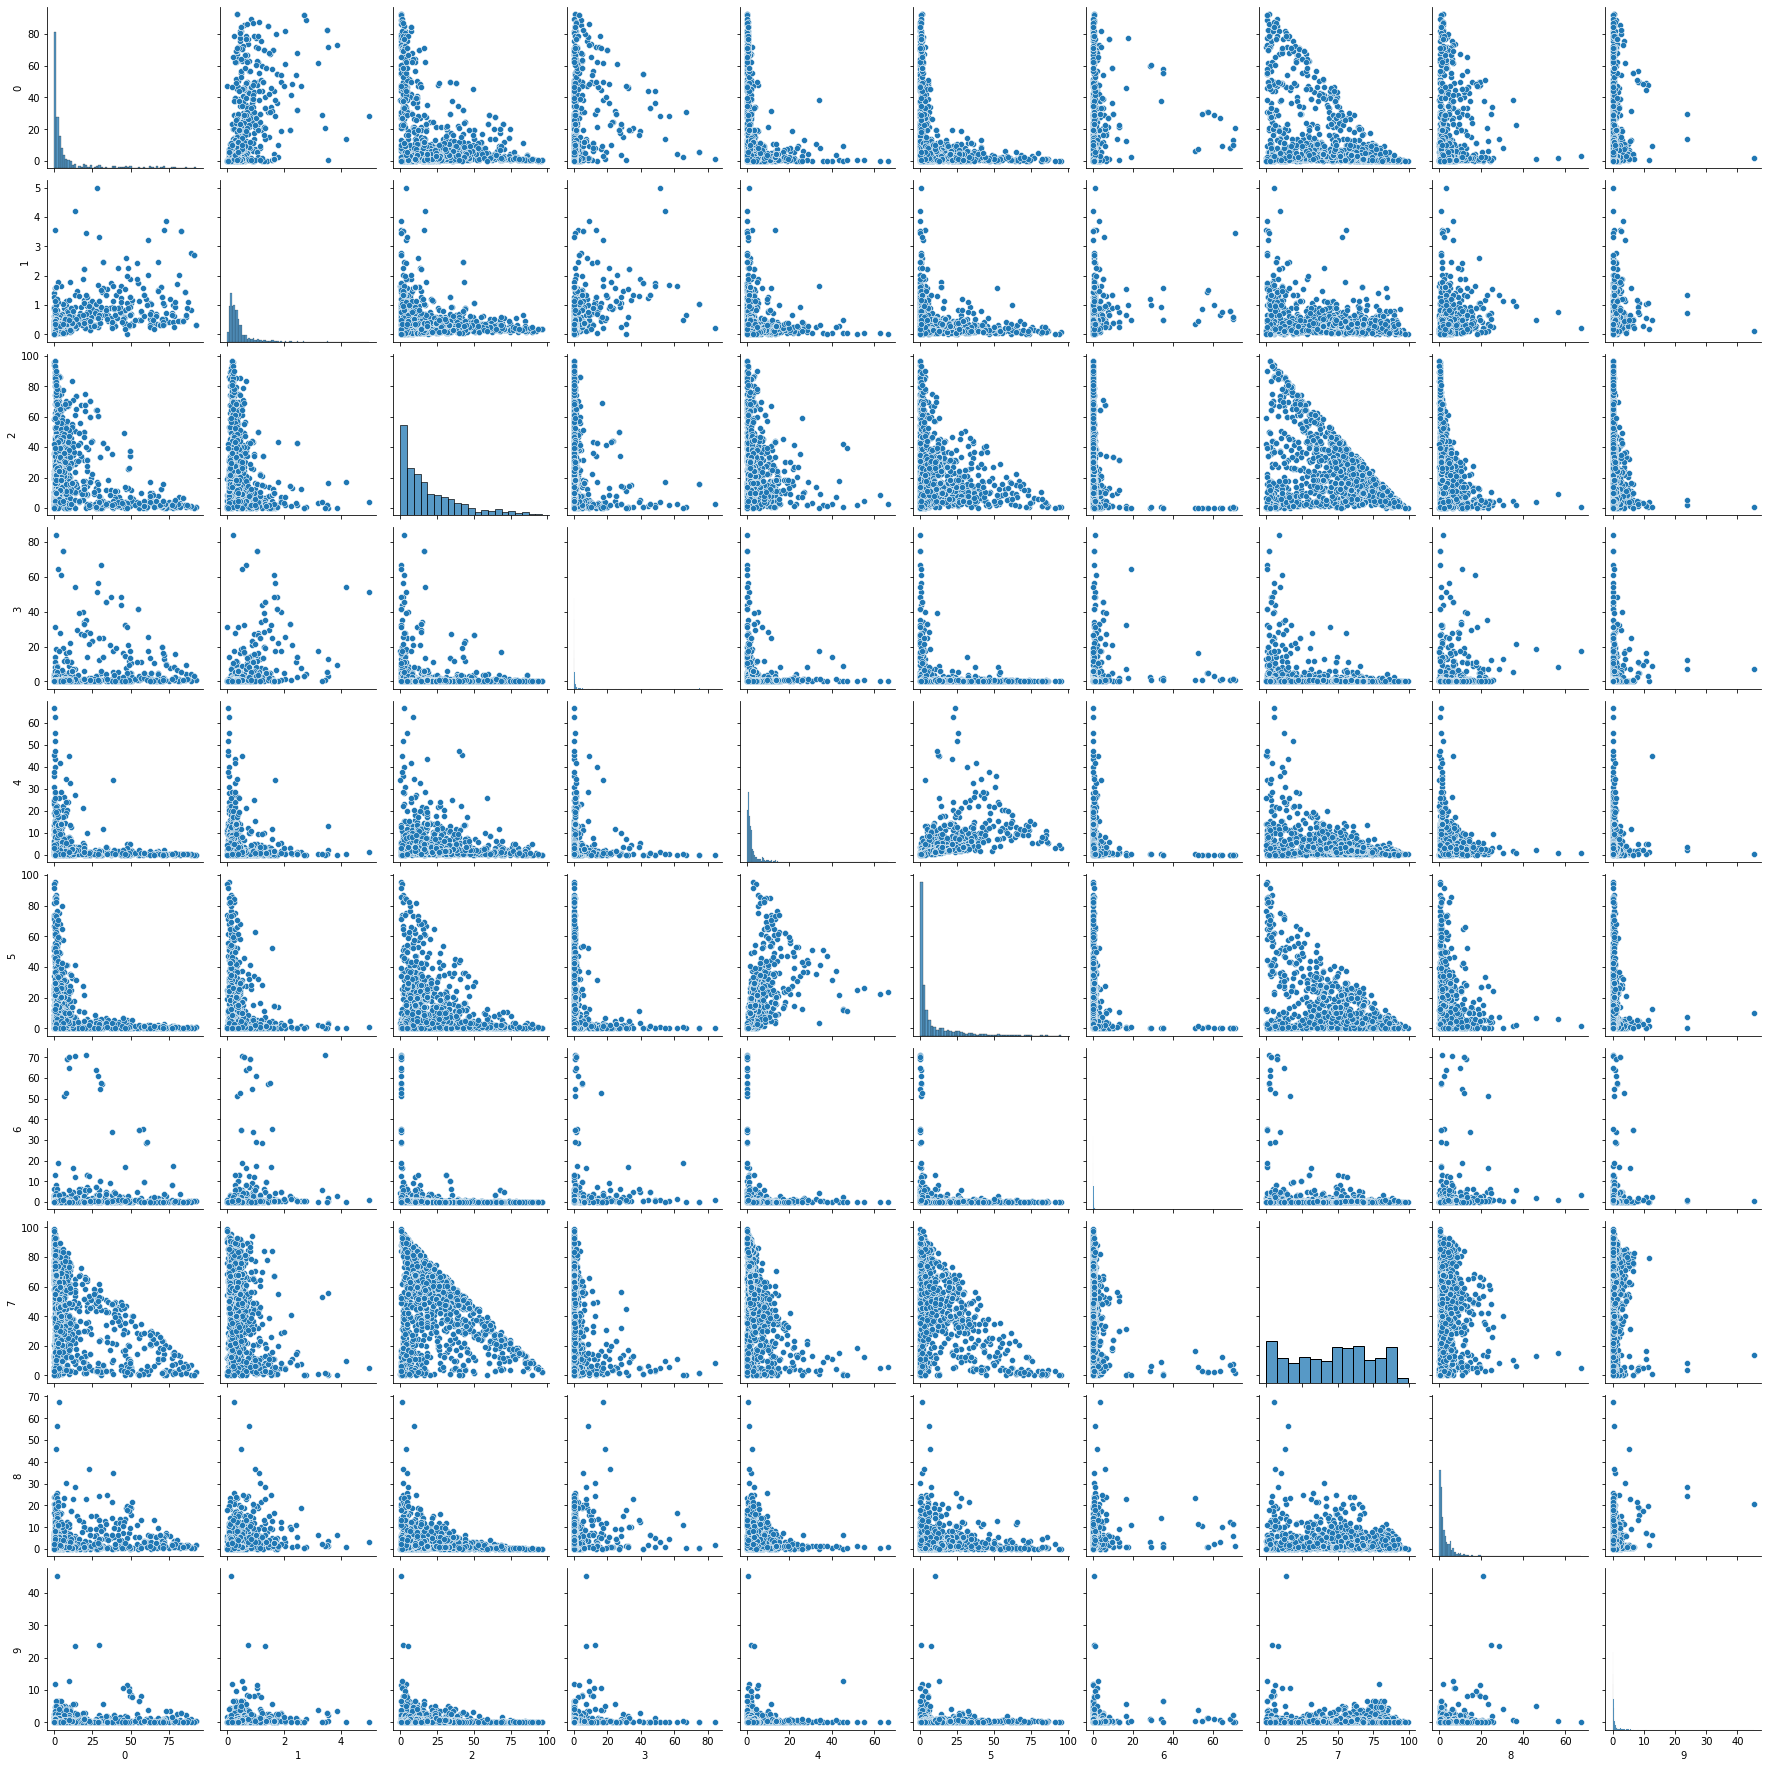

In [ ]:
#scatter plots for all column pairs ( google )
sns.pairplot(df_new_new_columns)
#Correlation matrix
corrm = df_new_new_columns.corr()

Question 16

In [ ]:
#iterate thru all col of our subframe
for col in subframe.columns:
  #using statsmodel library and its api module
  sm.qqplot(subframe[col])
  #plot for every column
  plt.title(col)

Question 17a

In [ ]:
#for a 2 row dataframe we can use this function

colname_list =[]
for col_name in subframe.columns:
   b=((col_name))
   colname_list.append(b)

colval_list=[]
for col_name in subframe.columns:
   rowsum = df[col_name].sum()
   c=((rowsum))
   colval_list.append(c)

dataFramepie = pd.DataFrame({"category": colname_list,"Number": colval_list})
plt.pie(dataFramepie["Number"], labels = dataFramepie["category"])


Question 17 b

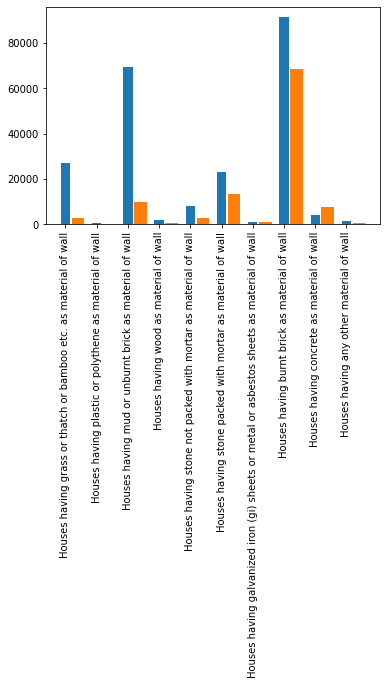

In [ ]:
#number of houses category in rural vs urban areas -- bar plot


#different dataframe for rural and urban places
rural_dataframe=df.loc[df['Type of residence namely rural or urban']=='Rural']
urban_dataframe=df.loc[df['Type of residence namely rural or urban']=='Urban']

#for storing means -- y axis
rural_means=[]
urban_means=[]

#i is the column name not the index
x1=[]
x2=[]
x=1
for i in subframe.columns:
  value1=np.mean(rural_dataframe[i])
  rural_means.append(value1)
  value2=np.mean(urban_dataframe[i])
  urban_means.append(value2)
  #To avoid overlapping of bars
  x1.append(x-0.2)
  x2.append(x+0.2)
  x=x+1

#0.1 , 0.4 are widths , x1 x2 different for every element of rural_means
#ie distance from y axis is diff for every bar and thus we avoid overlapping
plt.bar(x1,rural_means,0.3)
plt.bar(x2,urban_means,0.4)
plt.xticks(x1,subframe.columns,rotation=90)
plt.show()

#we get to see that even though we expect bad housing quality in rural areas -- poor housing(ie these houses that arent that strong or permament) exists in urban areas too

Question 17c

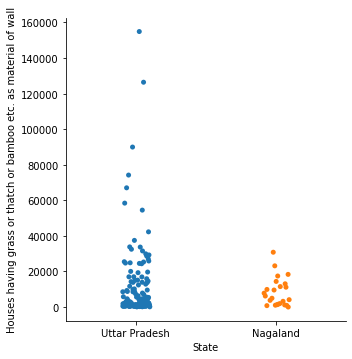

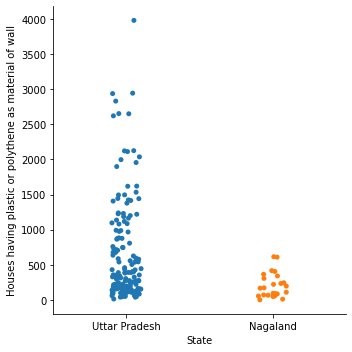

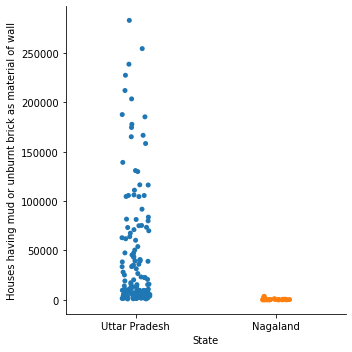

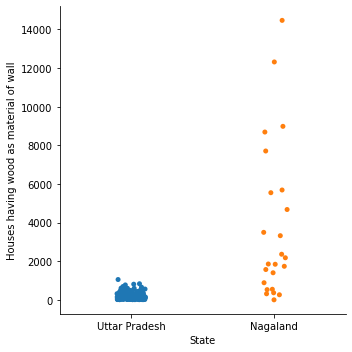

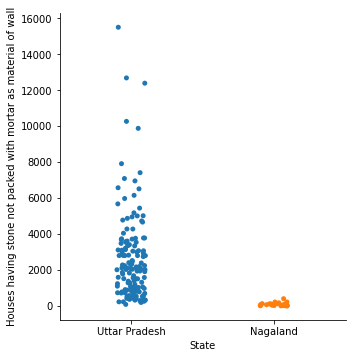

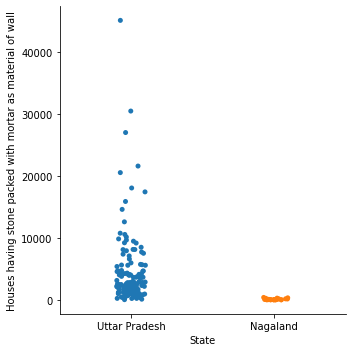

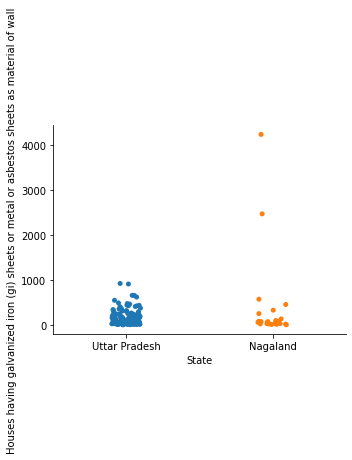

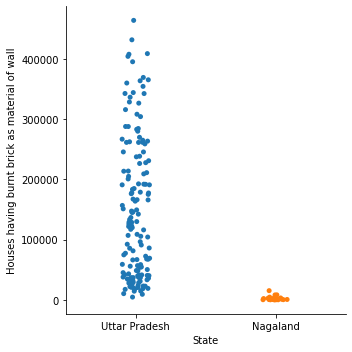

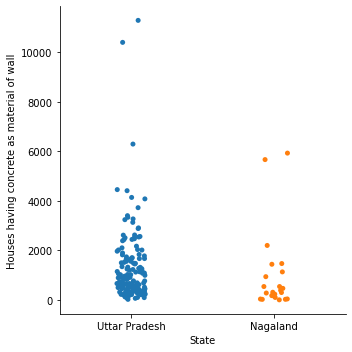

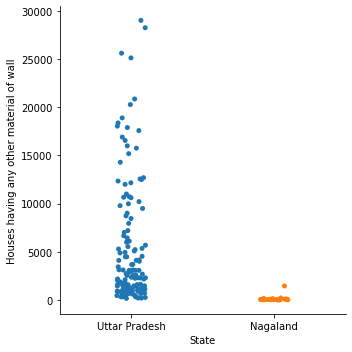

In [ ]:
#comparison of % of number of kachha houses(all types) in nagaland(low populated) vs uttar pradesh(highly populated) -- voilin plot

#new dataframe including data of UP and nagaland only
new_dataframe=df.loc[((df['State']=='Nagaland')|(df['State']=='Uttar Pradesh'))]


for i in subframe.columns:
  #make voilin plots of every aspect of house comparison for the 2 states (it takes mean of housing data on its own )
  sns.catplot(x='State', y=i ,data=new_dataframe)
  plt.show()

#we can see a wider distribution in UP across all types of houses except for the houses with walls made of wood (spreads more in nagaland plot)

References:

GeeksforGeeks.org
Stack overflow
w3schools.com
Youtube videos on pandas , numpy and matplotlib
numpy.org
tutorialspoint.com
towardsdatascience.com
analyticsvidhya.com

students - 210070018 , 210051001